<a href="https://colab.research.google.com/github/jocastrocUnal/EfectoMateo/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
!pip install imageio

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.stats import boxcox
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [341]:
# from google.colab import drive
# drive.mount('/content/drive')

# <center>Análisis del Efecto Mateo en las Tasas de Mortalidad Infantil</center>
<center>Venus Celeste Puertas Gualtero, Joan Nicolás Castro Cortes</center>

El siguiente conjunto de datos contiene las tasas de mortalidad infantil (niños menores de 5 años) entre los años 2000 y 2022 para todos los países del mundo. En este cuaderno se busca estudiar el comportamiento de las tasas de mortalidad en Latinoamérica y detectar la presencia del efecto Mateo en caso de que exista

El estudio de las tasas de mortalidad infantil es crucial por varias razones. Primero, puede revelar desigualdades socioeconómicas y brechas en el acceso a la atención médica entre diferentes regiones o países. Segundo, ofrece una medida de la calidad y accesibilidad de los sistemas de salud. Tercero, el efecto Mateo, que refleja cómo las ventajas acumuladas generan más ventajas, puede ayudar a entender cómo las desigualdades pueden perpetuarse a lo largo del tiempo. Este entendimiento puede informar políticas públicas dirigidas a mitigar desigualdades y mejorar la salud infantil en la región.

<figure>
<center>
<img src="https://github.com/jocastrocUnal/EfectoMateo/blob/main/figuras/children.jpg?raw=true" width="600" height="400" align="center"/>
</center>
</figure>


## Carga de datos y eliminación de NAs

In [342]:
#child = pd.read_csv('/content/drive/MyDrive/Seminario/datos/child_mortality.csv')
child = pd.read_csv('datos/child_mortality.csv')

datos = child.loc[:, ['country'] + list(map(str, range(2000,2023)))]

datos.dropna(inplace=True)
datos

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,129.00,125.00,121.00,117.00,113.00,109.00,104.00,100.00,96.00,...,77.00,73.50,70.40,67.50,64.70,62.30,60.10,58.10,56.10,54.20
1,Angola,206.00,200.00,193.00,185.00,176.00,167.00,157.00,148.00,138.00,...,98.40,92.90,88.10,84.00,80.40,77.20,74.50,72.30,70.40,68.60
2,Albania,25.90,24.50,23.10,21.80,20.40,19.20,17.90,16.70,15.50,...,10.70,10.10,9.60,9.27,9.02,8.82,8.68,8.52,8.36,8.19
3,Andorra,6.41,6.16,5.93,5.71,5.49,5.27,5.05,4.84,4.62,...,3.61,3.43,3.27,3.14,3.01,2.89,2.87,2.85,2.82,2.79
4,UAE,11.20,10.90,10.60,10.30,10.00,9.73,9.44,9.18,8.93,...,8.00,7.91,7.83,7.76,7.68,7.59,7.37,7.16,6.97,6.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,21.10,20.40,19.90,19.50,19.20,19.00,18.90,18.90,18.90,...,17.90,17.60,17.20,16.70,16.30,15.80,15.40,14.90,14.50,14.10
193,Yemen,94.90,90.30,85.60,81.10,76.70,72.50,68.40,64.60,61.00,...,55.00,55.00,55.00,55.00,55.00,55.00,54.90,54.60,54.10,53.50
194,South Africa,73.90,75.80,77.40,79.10,79.40,78.50,76.00,71.00,64.80,...,41.20,39.50,37.70,36.60,35.30,33.80,32.90,32.10,31.30,30.50
195,Zambia,162.00,153.00,142.00,130.00,119.00,110.00,101.00,95.40,90.40,...,70.70,66.90,64.60,62.00,59.40,57.80,56.10,54.50,53.00,51.50


Filtramos únicamente por los países latinoamericanos

In [343]:
paises_latinoamericanos = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica',
    'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala',
    'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
    'Uruguay', 'Venezuela', 'Belize', 'Guyana', 'Suriname'
]
# Filtrar el dataframe

datos = datos[datos['country'].isin(paises_latinoamericanos)]

In [344]:
# Establece la columna 'country' como el índice del DataFrame
datos.set_index('country', inplace=True)
datos

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Argentina,19.60,18.90,18.30,17.70,17.10,16.50,16.10,15.70,15.30,14.90,...,12.70,12.10,11.50,10.90,10.40,9.94,9.66,9.40,9.16,8.94
Belize,23.60,22.90,22.20,21.70,21.30,20.90,20.60,20.20,19.90,19.40,...,16.90,16.10,15.30,14.50,13.80,13.00,12.70,12.40,12.10,11.80
Bolivia,75.30,71.00,67.00,63.10,59.40,55.80,52.50,49.40,46.40,43.70,...,34.40,32.40,30.80,29.30,28.00,26.80,26.10,25.40,24.70,23.90
Brazil,34.80,32.60,30.50,28.50,26.60,24.90,23.30,21.90,20.70,19.60,...,16.70,16.20,15.70,16.40,14.80,14.30,13.90,13.50,13.10,12.70
Chile,10.90,10.30,9.80,9.51,9.29,9.10,8.96,8.91,8.89,8.83,...,8.26,8.10,7.89,7.66,7.43,7.19,7.03,6.86,6.68,6.50
Colombia,25.00,24.20,23.50,22.80,22.20,21.50,20.90,20.30,19.70,19.10,...,16.80,16.20,15.70,15.20,14.70,14.20,13.80,13.50,13.10,12.80
Costa Rica,13.00,12.20,11.60,11.10,10.80,10.50,10.40,10.30,10.30,10.20,...,9.46,9.24,9.05,8.93,8.85,8.79,8.47,8.19,7.96,7.75
Cuba,8.55,8.23,7.93,7.65,7.40,7.15,6.93,6.71,6.51,6.32,...,5.67,5.52,5.38,5.24,5.11,4.98,4.90,4.82,4.74,4.66
Dominican Republic,40.90,39.80,38.90,38.00,37.30,36.70,36.10,35.60,35.10,34.60,...,32.70,32.10,31.30,30.60,29.70,28.90,28.30,27.70,27.00,26.30


In [345]:
# Transpone el DataFrame
datos_transpuesto = datos.T

# Resetea el índice del DataFrame transpuesto
datos_transpuesto.reset_index(inplace=True)

# Renombra la columna 'index' a 'year'
datos_transpuesto.rename(columns={'index': 'year'}, inplace=True)
datos_transpuesto['year']=datos_transpuesto['year'].astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

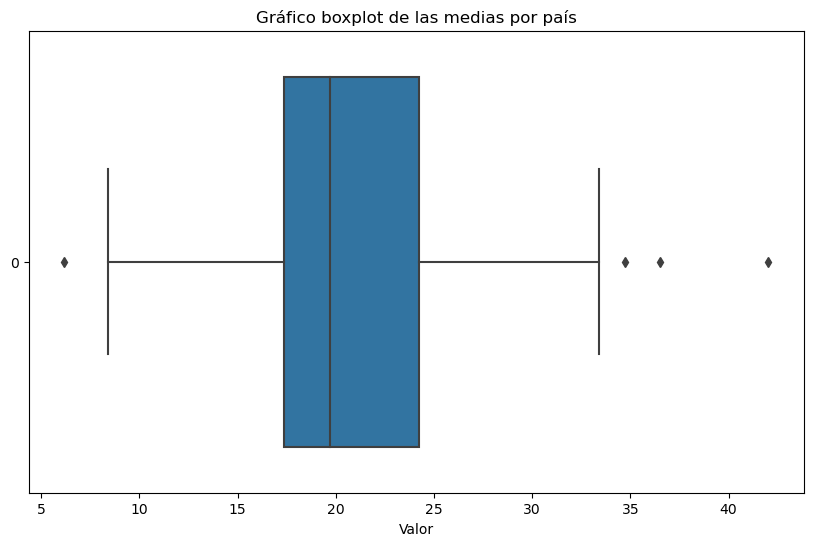

In [346]:
medias_por_fila = datos.iloc[:,1:22].mean(axis=1)
# Calcular Q1, Q3 e IQR para medias_por_fila
Q1 = medias_por_fila.quantile(0.25)
Q3 = medias_por_fila.quantile(0.75)
IQR = Q3 - Q1

# Límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_indices = medias_por_fila[(medias_por_fila < lower_bound) | (medias_por_fila > upper_bound)].index.tolist()

# Asegúrate de que todas las medias sean positivas antes de aplicar la transformación Box-Cox
plt.figure(figsize=(10, 6))
sns.boxplot(data=medias_por_fila, orient="h")
plt.title('Gráfico boxplot de las medias por país')
plt.xlabel('Valor')
plt.show


In [347]:
outliers_indices

['Bolivia', 'Cuba', 'Guatemala', 'Guyana']

El siguiente gif permite observar el comportamiento de las tasas de mortalidad por país

In [348]:
paises = datos_transpuesto.columns[1:]
# Convertir la columna 'Fecha' a tipo datetime
datos_transpuesto['YEAR'] = pd.to_datetime(datos_transpuesto['year'])


In [349]:

imagenes = []
for pais in paises:

  # Crear el gráfico de línea
  plt.figure(figsize=(10, 10))
  plt.plot(datos_transpuesto['YEAR'], datos_transpuesto[pais], marker='o', linestyle='-', color='b')
  plt.title('Gráfico de la tasa de mortalidad infantil por año')
  plt.xlabel(pais)
  plt.ylabel(pais)
  plt.grid(True)
  plt.tight_layout()
  filename = f"temp_{pais}.png"
  plt.savefig(filename)
  plt.close()

  # Agregar la imagen a la lista
  imagenes.append(imageio.imread(filename))

# Crear el GIF
imageio.mimsave('graficos.gif', imagenes, duration=100)

C:\Users\Celeste\AppData\Local\Temp\ipykernel_3580\2036837229.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagenes.append(imageio.imread(filename))


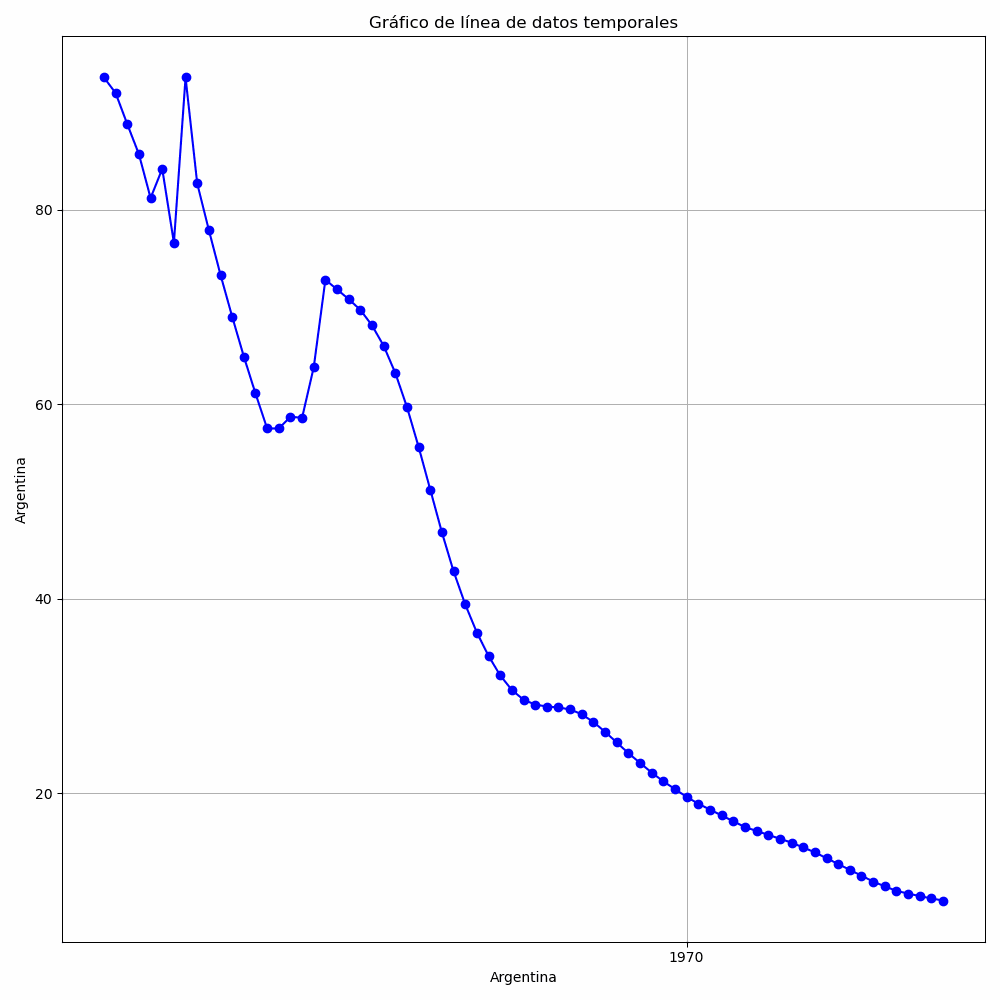







Dado que en algunos de los gráficos se observa heterocedasticidad marginal se aplica una transformación box-cox

In [350]:
for col in datos_transpuesto.columns[1:-1]:
    datos_transpuesto[col], _ = boxcox(datos_transpuesto[col])



In [351]:
datos_transpuesto #Datos reorganizados

country,year,Argentina,Belize,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,Dominican Republic,...,Mexico,Nicaragua,Panama,Peru,Paraguay,El Salvador,Suriname,Uruguay,Venezuela,YEAR
0,2000,6.233230,34.274924,2.056951,1.014268,4.217994,3.470647,1.299610,0.981212,40.087571,...,1.862755,0.480949,4.565106,1.314384,3.959383,1.890875,2.646749,1.949378,0.459631,1970-01-01 00:00:00.000002000
1,2001,6.096426,33.051475,2.046377,1.011975,4.058715,3.432935,1.285977,0.975051,38.980748,...,1.847099,0.480910,4.520639,1.307986,3.929242,1.876634,2.629068,1.938654,0.459588,1970-01-01 00:00:00.000002001
2,2002,5.976922,31.834645,2.035703,1.009486,3.921953,3.398948,1.274771,0.968856,38.075204,...,1.830180,0.480864,4.475318,1.301649,3.902303,1.862085,2.608982,1.924773,0.459547,1970-01-01 00:00:00.000002002
3,2003,5.855235,30.969628,2.024401,1.006783,3.840829,3.363982,1.264696,0.962669,37.169695,...,1.815881,0.480814,4.429105,1.294996,3.870840,1.847276,2.591558,1.913264,0.459510,1970-01-01 00:00:00.000002003
4,2004,5.731250,30.280153,2.012735,1.003848,3.778355,3.333187,1.258293,0.956778,36.465435,...,1.800580,0.480754,4.381959,1.288400,3.838620,1.832270,2.571617,1.895276,0.459453,1970-01-01 00:00:00.000002004
5,2005,5.604838,29.592972,2.000365,1.000852,3.723727,3.296239,1.251598,0.950505,35.861801,...,1.787227,0.480690,4.333837,1.282051,3.805607,1.817144,2.554653,1.869812,0.459399,1970-01-01 00:00:00.000002005
6,2006,5.519149,29.079113,1.988002,0.997643,3.683064,3.263644,1.249298,0.944639,35.258184,...,1.774658,0.480617,4.284692,1.275763,3.776036,1.801995,2.537062,1.842453,0.459339,1970-01-01 00:00:00.000002006
7,2007,5.432276,28.396034,1.975354,0.994460,3.668455,3.230145,1.246962,0.938415,34.755182,...,1.763066,0.480540,4.234475,1.269215,3.741417,1.786939,2.518799,1.812931,0.459283,1970-01-01 00:00:00.000002007
8,2008,5.344172,27.885296,1.962010,0.991398,3.662599,3.195687,1.246962,0.932420,34.252192,...,1.752650,0.480461,4.183130,1.262939,3.710371,1.772113,2.499817,1.780921,0.459248,1970-01-01 00:00:00.000002008
9,2009,5.254788,27.037106,1.948924,0.988271,3.644985,3.160214,1.244589,0.926398,33.749215,...,1.743603,0.480385,4.130600,1.256566,3.669358,1.756177,2.480060,1.750561,0.459235,1970-01-01 00:00:00.000002009


En el paper de [*Shaywitz et al*](https://www.jstor.org/stable/748203), en el que se evalua el efecto mateo sobre el desarrollo de habilidades y de IQ la ecuación de regresión lineal presentada es:

$$
Y_i = \alpha_i + \beta_i (T_{ij} - T_i) + E_i
$$



Donde:
- $ Y_i $ es la puntuación del $ i $-ésimo niño en el $ j $-ésimo grado.
- $ \alpha_i $ es la tasa  media del $ i $-ésimo niño.
- $ \beta_i $ es la pendiente que representa el cambio en el tiempo para el $ i $-ésimo niño.
- $ T_{ij} $ es el grado en el que el niño $ i $ fue evaluado.
- $ T_i $ es el grado medio para el niño $ i $.
- $ E_i $ es el error aleatorio.

En nuestro caso particular los grados se reemplazan por los años en los que le país tiene registros y los niños por los países

In [352]:
# Asegurarse de que 'Grado' sea numérico
datos_transpuesto['Grado'] = pd.to_numeric(datos_transpuesto['year'])

# Calcula el grado medio para cada niño
datos_transpuesto['Grado Medio'] = datos_transpuesto['Grado'].mean()

# Crea una nueva columna para la variable independiente ajustada (Grado - Grado Medio)
datos_transpuesto['Grado Ajustado'] = datos_transpuesto['Grado'] - datos_transpuesto['Grado Medio']


In [353]:

# Cargar el dataframe
data = datos_transpuesto

def calcular_pendiente_media(y):
    # Definir el modelo de regresión
    X = data['Grado Ajustado']  # Grado Ajustado como variable independiente
    X = sm.add_constant(X)  # añadir una constante para el término de intersección

    # Ajustar el modelo de regresión
    modelo = sm.OLS(y, X).fit()

    # Obtener la pendiente y la intersección (media)
    pendiente, interseccion = modelo.params['Grado Ajustado'], modelo.params['const']
    pvalue_pendiente, pvalue_interseccion = modelo.pvalues['Grado Ajustado'], modelo.pvalues['const']
    r_squared = modelo.rsquared
    shapiro_stat, shapiro_p = stats.shapiro(modelo.resid)
    return pd.Series({
        'Media': interseccion,
        'Pendiente': pendiente,
        'P-Value Media': pvalue_interseccion,
        'P-Value Pendiente': pvalue_pendiente,
        'R^2': r_squared,
        'Shapiro Statistic': shapiro_stat,
        'Shapiro P-Value': shapiro_p
    })

# Eliminar las columnas que no corresponden a países
data_paises = data.drop(columns=['year', 'Grado', 'Grado Medio', 'Grado Ajustado','YEAR'])

# Aplicar la función a cada país
resultados = data_paises.apply(calcular_pendiente_media)


In [354]:
resultadost=resultados.T

In [355]:
resultadost.describe()

,Media,Pendiente,P-Value Media,P-Value Pendiente,R^2,Shapiro Statistic,Shapiro P-Value
count,22.000000,22.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000
mean,4.821562,-0.096176,8.496183e-36,1.015951e-03,0.957886,0.938268,0.331706
std,8.001308,0.227678,3.984726e-35,4.765232e-03,0.164075,0.033928,0.315172
min,0.459499,-0.928102,6.795012e-84,1.142794e-44,0.224574,0.871145,0.006742
25%,1.236281,-0.047066,1.957929e-62,7.269978e-32,0.992545,0.916635,0.057560
50%,1.825621,-0.016693,3.553501e-56,5.689926e-27,0.996279,0.946900,0.253066
75%,3.569667,-0.005886,1.998339e-50,8.347503e-24,0.998758,0.959518,0.453700
max,32.573161,0.000016,1.869009e-34,2.235092e-02,0.999923,0.982406,0.942736


- El valor promedio de estas medias es aproximadamente 4.82, con un rango que va desde 0.46 y 32.57
- En promedio, la pendiente es de aproximadamente -0.096 lo que indica una disminución de la tasa de mortalidad a través del tiempo.
- Los p-valores son extremadamente pequeños, lo que sugiere que tanto la intercepción como la pendiente son estadísticamente significativas.
- En general se tiene que los modelos explican entre el $22%$ y el $99%$ de la variabilidad de las tasas de mortalidad en cada país


Dado que queremos estudiar la reducción en las tasas de mortalidad, verificamos si alguna de ellas presenta un comportamiento creciente para excluirla del análisis.

In [357]:
# Pendiente positiva
resultadost.loc[resultadost['Pendiente']>0]

,Media,Pendiente,P-Value Media,P-Value Pendiente,R^2,Shapiro Statistic,Shapiro P-Value
country,,,,,,,
Venezuela,0.459499,0.000016,2.212925e-72,0.022351,0.224574,0.875801,0.00829


Verificamos para cuáles modelos se evidencia que el coeficiente de la pendiente no es significativo

In [358]:
# P valores significativos a más del 5 por ciento
resultadost.loc[resultadost['P-Value Pendiente']> 0.05]

,Media,Pendiente,P-Value Media,P-Value Pendiente,R^2,Shapiro Statistic,Shapiro P-Value
country,,,,,,,


In [359]:
resultadost=resultadost.loc[resultadost['Pendiente']<=0]
resultadost=resultadost.loc[resultadost['P-Value Pendiente']<= 0.05]
resultadost=resultadost.loc[resultadost['Shapiro P-Value']>= 0.1]
# resultadost=resultadost.loc[resultadost['R^2']>= 0.7]

In [360]:
resultadost.loc[resultadost['R^2']<0.90]

,Media,Pendiente,P-Value Media,P-Value Pendiente,R^2,Shapiro Statistic,Shapiro P-Value
country,,,,,,,


In [361]:
import matplotlib.pyplot as plt

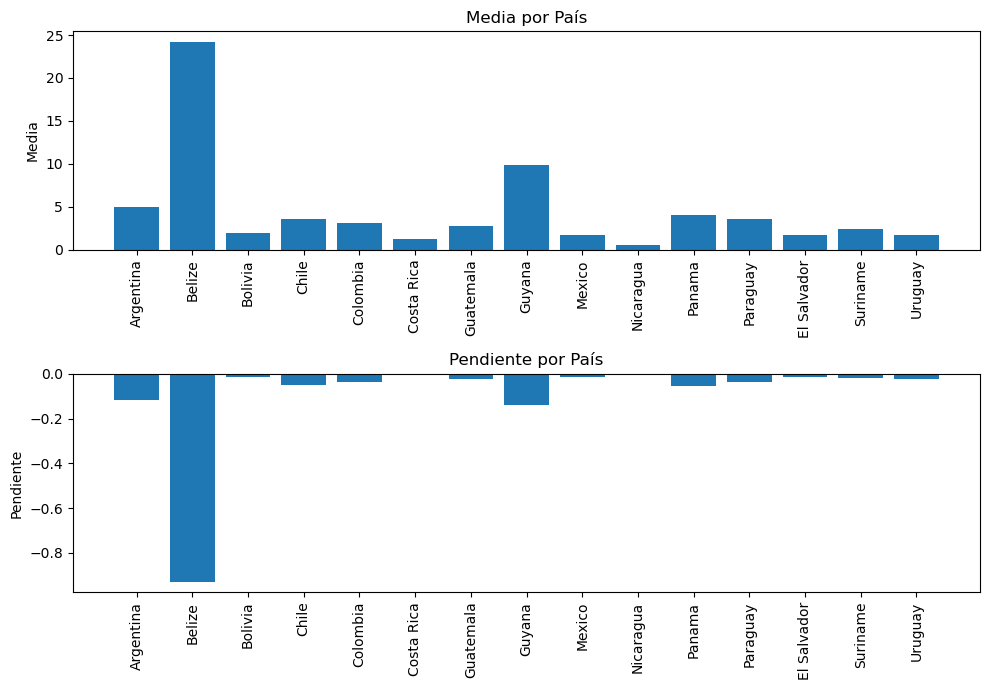

In [362]:
# Graficar la media y la pendiente
fig, ax = plt.subplots(2,1,figsize=(10,7))


# Graficar la media
ax[0].bar(resultadost.index, resultadost['Media'])
ax[0].set_title('Media por País')
ax[0].set_ylabel('Media')
ax[0].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x para mejor legibilidad

# Graficar la pendiente
ax[1].bar(resultadost.index, resultadost['Pendiente'])
ax[1].set_title('Pendiente por País')
ax[1].set_ylabel('Pendiente')
ax[1].tick_params(axis='x', rotation=90)  # Rotar las etiquetas en el eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()



El anterior gráfico permite ver que en los picos de medias hay también picos negativos de pendientes, lo que puede indicar una relación inversamente proporcional entre la media y la pendiente. Es decir que países latinoamericanos con tasas de mortalidad más alta suelen tener una reducción de dicha tasa mucho más rápidamente.

In [363]:
datos

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Argentina,19.60,18.90,18.30,17.70,17.10,16.50,16.10,15.70,15.30,14.90,...,12.70,12.10,11.50,10.90,10.40,9.94,9.66,9.40,9.16,8.94
Belize,23.60,22.90,22.20,21.70,21.30,20.90,20.60,20.20,19.90,19.40,...,16.90,16.10,15.30,14.50,13.80,13.00,12.70,12.40,12.10,11.80
Bolivia,75.30,71.00,67.00,63.10,59.40,55.80,52.50,49.40,46.40,43.70,...,34.40,32.40,30.80,29.30,28.00,26.80,26.10,25.40,24.70,23.90
Brazil,34.80,32.60,30.50,28.50,26.60,24.90,23.30,21.90,20.70,19.60,...,16.70,16.20,15.70,16.40,14.80,14.30,13.90,13.50,13.10,12.70
Chile,10.90,10.30,9.80,9.51,9.29,9.10,8.96,8.91,8.89,8.83,...,8.26,8.10,7.89,7.66,7.43,7.19,7.03,6.86,6.68,6.50
Colombia,25.00,24.20,23.50,22.80,22.20,21.50,20.90,20.30,19.70,19.10,...,16.80,16.20,15.70,15.20,14.70,14.20,13.80,13.50,13.10,12.80
Costa Rica,13.00,12.20,11.60,11.10,10.80,10.50,10.40,10.30,10.30,10.20,...,9.46,9.24,9.05,8.93,8.85,8.79,8.47,8.19,7.96,7.75
Cuba,8.55,8.23,7.93,7.65,7.40,7.15,6.93,6.71,6.51,6.32,...,5.67,5.52,5.38,5.24,5.11,4.98,4.90,4.82,4.74,4.66
Dominican Republic,40.90,39.80,38.90,38.00,37.30,36.70,36.10,35.60,35.10,34.60,...,32.70,32.10,31.30,30.60,29.70,28.90,28.30,27.70,27.00,26.30


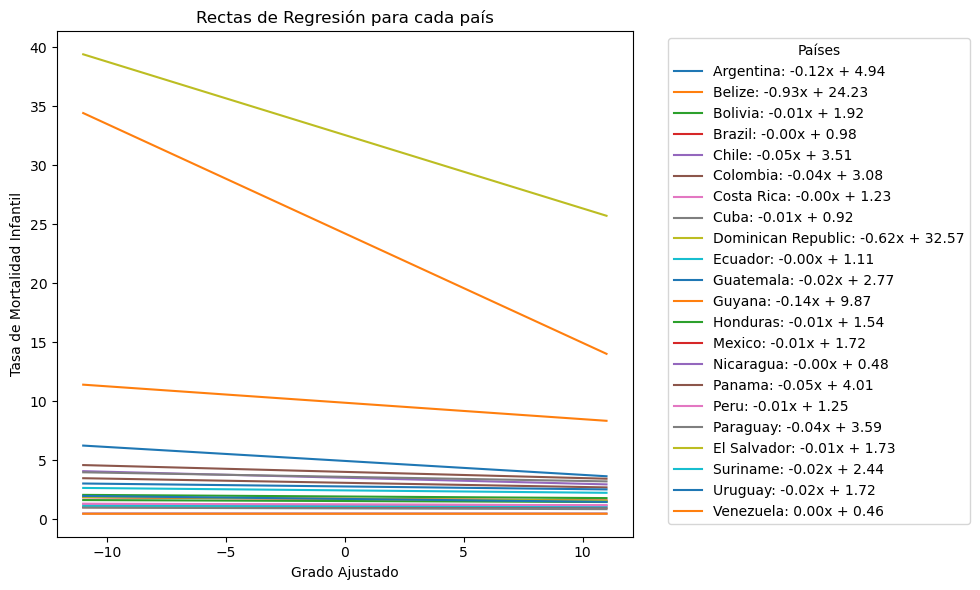

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Cargar el dataframe
data = datos_transpuesto

def plot_regression(df, country):
    # Definir el modelo de regresión
    X = df['Grado Ajustado']  # Grado Ajustado como variable independiente
    y = df[country]  # Tasas de mortalidad infantil como variable dependiente
    X = sm.add_constant(X)  # añadir una constante para el término de intersección

    # Ajustar el modelo de regresión
    modelo = sm.OLS(y, X).fit()

    # Obtener los valores predichos para la recta de regresión
    y_pred = modelo.predict(X)

    # Trazar la recta de regresión
    plt.plot(df['Grado Ajustado'], y_pred, label=f'{country}: {modelo.params["Grado Ajustado"]:.2f}x + {modelo.params["const"]:.2f}')

# Lista de países
paises = data.columns[1:-4]  # Ajusta los índices según la estructura de tu DataFrame

# Crear una nueva figura
plt.figure(figsize=(10, 6))

# Graficar la regresión para cada país
for pais in paises:
    plot_regression(data, pais)

# Añadir etiquetas y leyenda
plt.xlabel('Grado Ajustado')
plt.ylabel('Tasa de Mortalidad Infantil')
plt.title('Rectas de Regresión para cada país')
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El gráfico anterior permite ver la posible existencia de un efecto mateo, dado que países con una media en la tasa de mortalidad más alta suelen tener una caída más rápida en las tasas.

In [365]:
resultadost['Media'].corr(resultadost['Pendiente'])

-0.9729648692302851

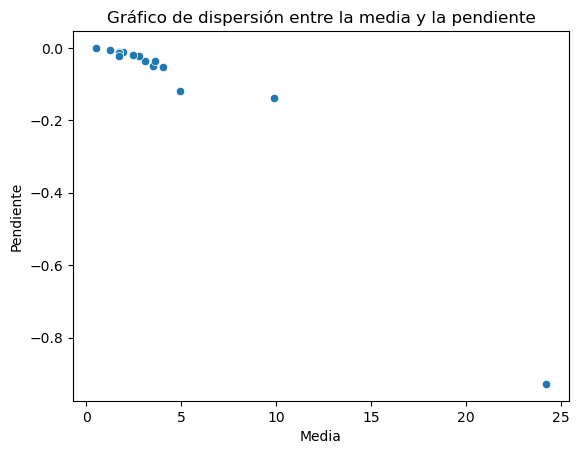

In [366]:
sns.scatterplot(data=resultadost, x='Media', y='Pendiente')

# Añadir etiquetas y título (opcional)
plt.xlabel('Media')
plt.ylabel('Pendiente')
plt.title('Gráfico de dispersión entre la media y la pendiente')

# Mostrar el gráfico
plt.show()